# Preparación de datos -  Empleados

1. Integración de los datos
2. Eliminar variables irrelevantes y redundantes
3. Descripción estadística de los datos
4. Limpieza de datos: atípicos y nulos
5. Análisis de correlaciones: redundancias entre todas las variables e irrelevancias respecto a la objetivo
6. Balanceo
7. Ingeniería de característicacs: comunmente se haceb en el notebook de creación de modelos.
8. Guardar los datos preparados


In [58]:
#Importamos librerías básicas
import pandas as pd # manipulacion dataframes
import numpy as np  # matrices y vectores
import matplotlib.pyplot as plt #gráfica



# 1. Integración de Datos










In [59]:
# Se cargan los datos de la tabla 1
datos1 = pd.read_excel("Preparacion_datos_empleados.xlsx",sheet_name='Informacion Personal')
datos1.head()

,ID,Casado,Carro,Hijos,Casa,Sexo
0,1,Sí,No,0,Alquiler,H
1,2,No,Sí,1,Alquiler,M
2,3,Sí,Sí,2,Prop,H
3,4,Sí,Sí,1,Alquiler,M
4,5,Sí,Sí,0,Prop,H


In [60]:
datos1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      1080 non-null   int64 
 1   Casado  1080 non-null   object
 2   Carro   1079 non-null   object
 3   Hijos   1080 non-null   int64 
 4   Casa    1080 non-null   object
 5   Sexo    1080 non-null   object
dtypes: int64(2), object(4)
memory usage: 50.8+ KB


In [61]:
#Revisamos si tenemos ID repetidos
ids = datos1['ID'].value_counts()
ids[ids > 1]

,count
ID,
48,2


In [62]:
#Sólo dejamos el id mas reciente
datos1.drop_duplicates(subset=['ID'], keep='last', inplace=True)
#datos1=datos1.drop_duplicates(subset=['ID'], keep='last')

#Verificamos de nuevo si tenemos ID repetidos
ids = datos1['ID'].value_counts()
ids[ids > 1]

,count
ID,


In [63]:
# Se cargan los datos de la tabla 2
datos2 = pd.read_excel("Preparacion_datos_empleados.xlsx",sheet_name='Informacion Laboral')
datos2.head()

,ID,Sueldo,Incapacidades,Antiguedad,Fuga
0,1,10000,7,15.0,No
1,2,20000,3,3.0,Sí
2,3,15000,5,10.0,Sí
3,4,30000,15,7.0,No
4,5,10000,1,6.0,Sí


In [64]:
datos2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             1079 non-null   int64  
 1   Sueldo         1079 non-null   int64  
 2   Incapacidades  1079 non-null   int64  
 3   Antiguedad     1077 non-null   float64
 4   Fuga           1079 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 42.3+ KB


In [65]:
#Revisamos si tenemos ID repetidos
ids = datos2['ID'].value_counts()
ids[ids > 1]

,count
ID,


In [66]:
#Join
data = pd.merge(datos1, datos2, on='ID',how='inner')
data.head()

,ID,Casado,Carro,Hijos,Casa,Sexo,Sueldo,Incapacidades,Antiguedad,Fuga
0,1,Sí,No,0,Alquiler,H,10000,7,15.0,No
1,2,No,Sí,1,Alquiler,M,20000,3,3.0,Sí
2,3,Sí,Sí,2,Prop,H,15000,5,10.0,Sí
3,4,Sí,Sí,1,Alquiler,M,30000,15,7.0,No
4,5,Sí,Sí,0,Prop,H,10000,1,6.0,Sí


In [67]:
#Revisamos si tenemos ID repetidos
ids = data['ID'].value_counts()
ids[ids > 1]

,count
ID,


In [68]:
#Se revisan los tipos de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             1079 non-null   int64  
 1   Casado         1079 non-null   object 
 2   Carro          1078 non-null   object 
 3   Hijos          1079 non-null   int64  
 4   Casa           1079 non-null   object 
 5   Sexo           1079 non-null   object 
 6   Sueldo         1079 non-null   int64  
 7   Incapacidades  1079 non-null   int64  
 8   Antiguedad     1077 non-null   float64
 9   Fuga           1079 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 84.4+ KB


In [69]:
#Corrección del tipo de datos object a categorías
data['Casado']=data['Casado'].astype('category')
data['Carro']=data['Carro'].astype('category')
data['Casa']=data['Casa'].astype('category')
data['Sexo']=data['Sexo'].astype('category')
data['Fuga']=data['Fuga'].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   ID             1079 non-null   int64   
 1   Casado         1079 non-null   category
 2   Carro          1078 non-null   category
 3   Hijos          1079 non-null   int64   
 4   Casa           1079 non-null   category
 5   Sexo           1079 non-null   category
 6   Sueldo         1079 non-null   int64   
 7   Incapacidades  1079 non-null   int64   
 8   Antiguedad     1077 non-null   float64 
 9   Fuga           1079 non-null   category
dtypes: category(5), float64(1), int64(4)
memory usage: 48.2 KB


# 2. Eliminar variables irrelevantes y redundantes
* Irrelevantes: cedulas, ids, nombres, telefonos, direcciones, códigos.
* Redundantes: validación por fórmula matemática que están repetidas

In [70]:
# Variables irrelevantes para el proceso de minería
data = data.drop('ID',axis=1) #Eliminamos el ID por ser irrelevante, axis=1 indica que es una columna
data.head()

,Casado,Carro,Hijos,Casa,Sexo,Sueldo,Incapacidades,Antiguedad,Fuga
0,Sí,No,0,Alquiler,H,10000,7,15.0,No
1,No,Sí,1,Alquiler,M,20000,3,3.0,Sí
2,Sí,Sí,2,Prop,H,15000,5,10.0,Sí
3,Sí,Sí,1,Alquiler,M,30000,15,7.0,No
4,Sí,Sí,0,Prop,H,10000,1,6.0,Sí


# 3. Descripción estadística

**Variables numéricas**

In [71]:
#Conocemos un poco los datos numéricos
data.describe()

,Hijos,Sueldo,Incapacidades,Antiguedad
count,1079.000000,1079.000000,1079.000000,1077.000000
mean,0.732159,21058.387396,5.625579,8.186630
std,0.997954,11898.898532,13.839617,5.252145
min,0.000000,8000.000000,0.000000,1.000000
25%,0.000000,10000.000000,1.000000,5.000000
50%,0.000000,20000.000000,3.000000,7.000000
75%,2.000000,30000.000000,7.000000,12.000000
max,3.000000,50000.000000,400.000000,20.000000


array([[<Axes: title={'center': 'Hijos'}>,
        <Axes: title={'center': 'Sueldo'}>],
       [<Axes: title={'center': 'Incapacidades'}>,
        <Axes: title={'center': 'Antiguedad'}>]], dtype=object)

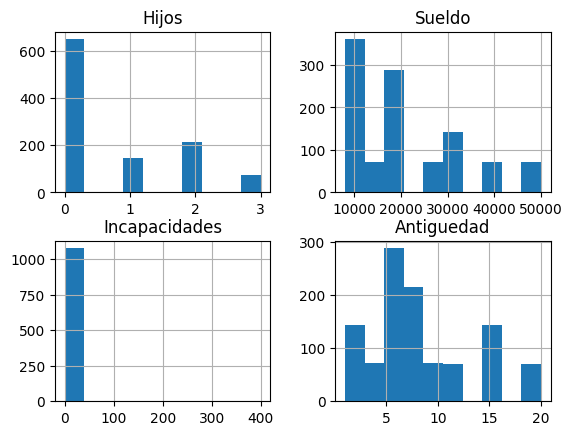

In [72]:
data.hist()

<Axes: >

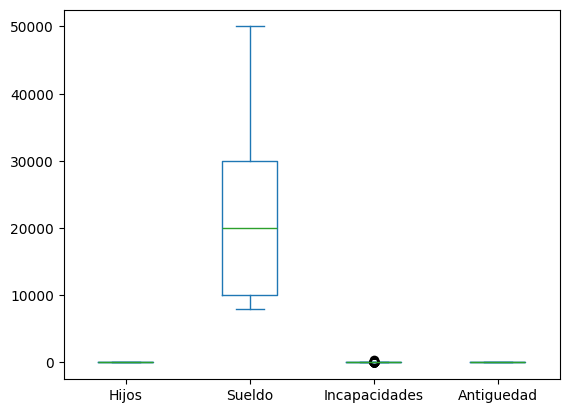

In [73]:
data.plot.box()

<Axes: >

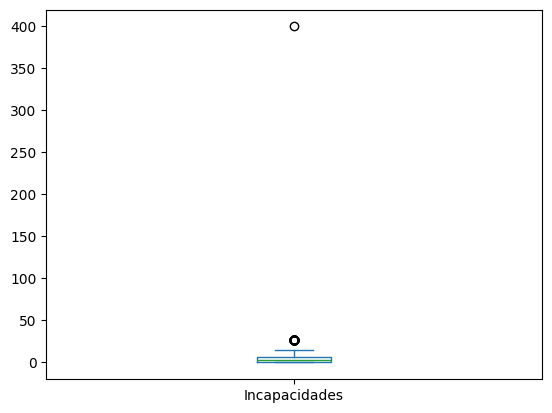

In [74]:
data['Incapacidades'].plot.box()

**Variables categóricas** (value_counts())

<Axes: xlabel='Casado'>

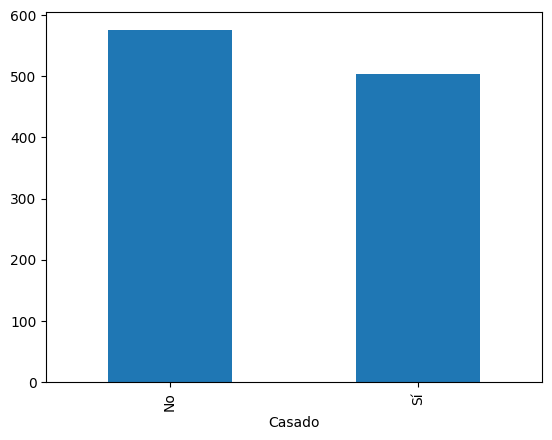

In [75]:
#Conocemos las variables categóricas: bar, barh, pie
data['Casado'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

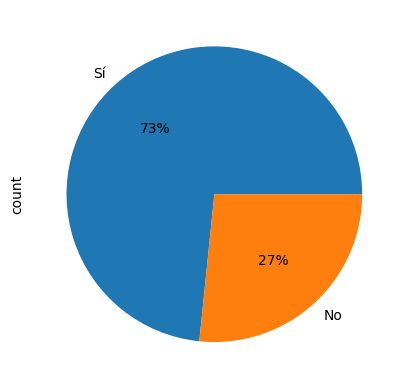

In [76]:
data['Carro'].value_counts().plot(kind='pie',autopct='%.0f%%')


<Axes: ylabel='Casa'>

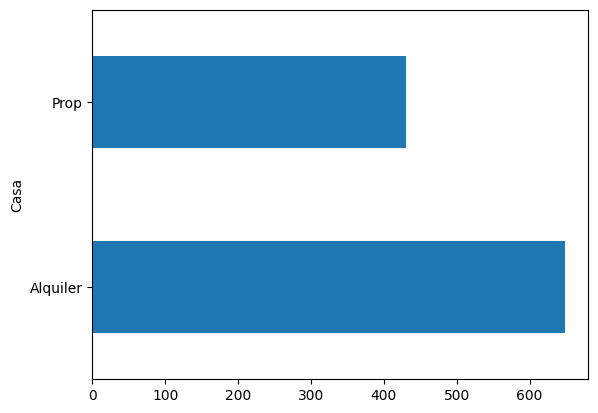

In [77]:
data['Casa'].value_counts().plot(kind='barh')


<Axes: ylabel='count'>

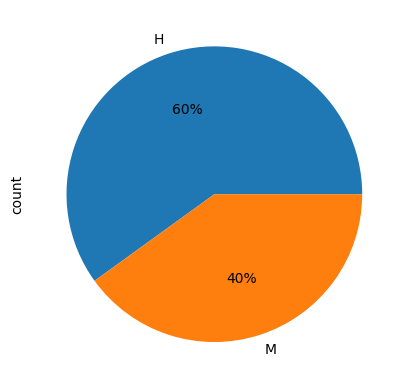

In [78]:
data['Sexo'].value_counts().plot(kind='pie',autopct='%.0f%%')

<Axes: xlabel='Fuga'>

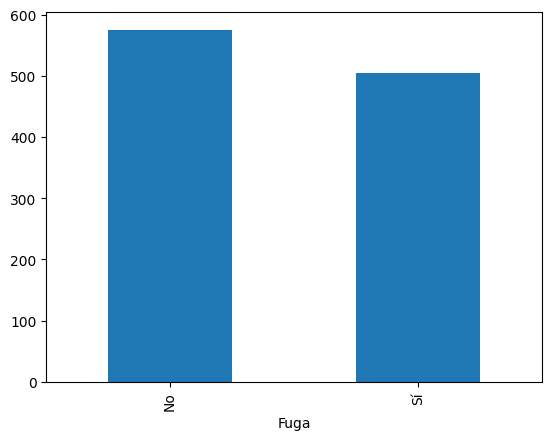

In [79]:
data['Fuga'].value_counts().plot(kind='bar')


**Gráficas de las relaciones entre variables**

<Axes: xlabel='Incapacidades', ylabel='Antiguedad'>

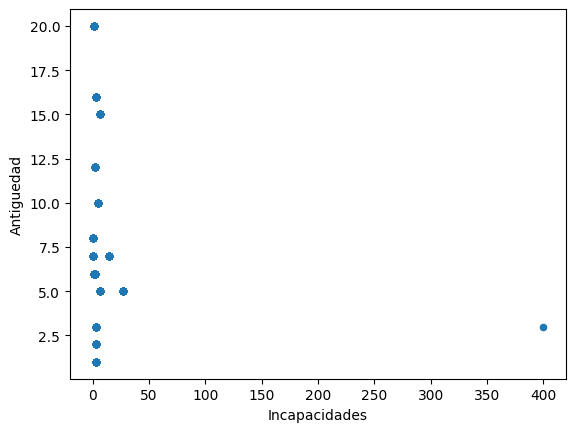

In [80]:
data.plot.scatter(x='Incapacidades',y='Antiguedad')

array([[<Axes: xlabel='Hijos', ylabel='Hijos'>,
        <Axes: xlabel='Sueldo', ylabel='Hijos'>,
        <Axes: xlabel='Incapacidades', ylabel='Hijos'>,
        <Axes: xlabel='Antiguedad', ylabel='Hijos'>],
       [<Axes: xlabel='Hijos', ylabel='Sueldo'>,
        <Axes: xlabel='Sueldo', ylabel='Sueldo'>,
        <Axes: xlabel='Incapacidades', ylabel='Sueldo'>,
        <Axes: xlabel='Antiguedad', ylabel='Sueldo'>],
       [<Axes: xlabel='Hijos', ylabel='Incapacidades'>,
        <Axes: xlabel='Sueldo', ylabel='Incapacidades'>,
        <Axes: xlabel='Incapacidades', ylabel='Incapacidades'>,
        <Axes: xlabel='Antiguedad', ylabel='Incapacidades'>],
       [<Axes: xlabel='Hijos', ylabel='Antiguedad'>,
        <Axes: xlabel='Sueldo', ylabel='Antiguedad'>,
        <Axes: xlabel='Incapacidades', ylabel='Antiguedad'>,
        <Axes: xlabel='Antiguedad', ylabel='Antiguedad'>]], dtype=object)

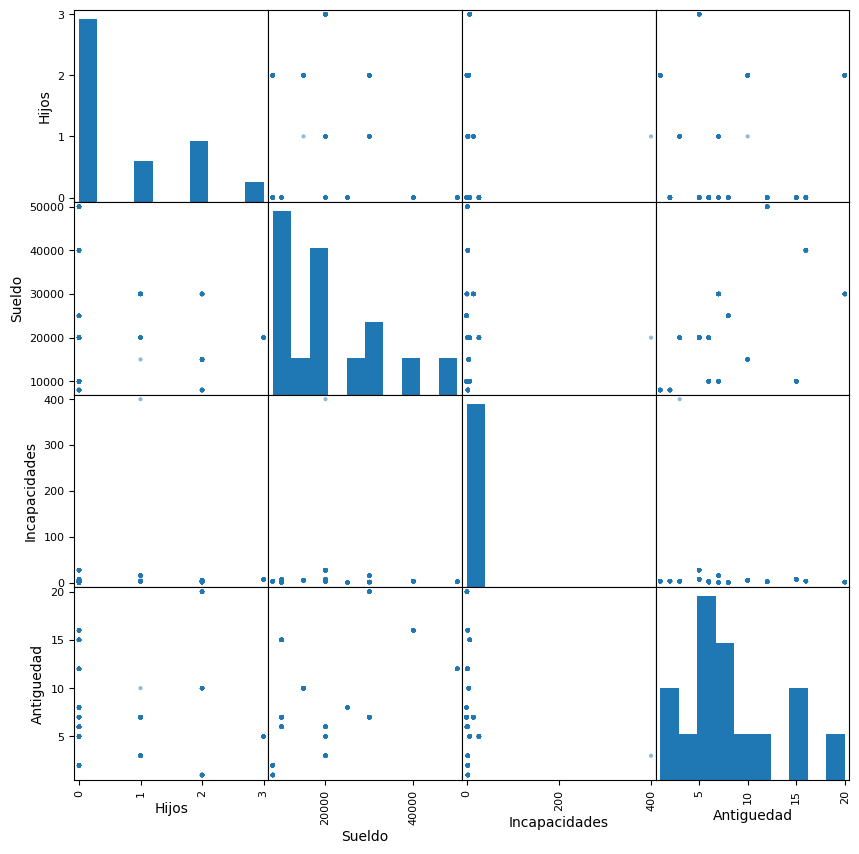

In [81]:
# Gráficas para identificar relaciones entre las variables
pd.plotting.scatter_matrix(data, figsize=(10,10))

Text(0.5, 0.92, 'Incapacidades')

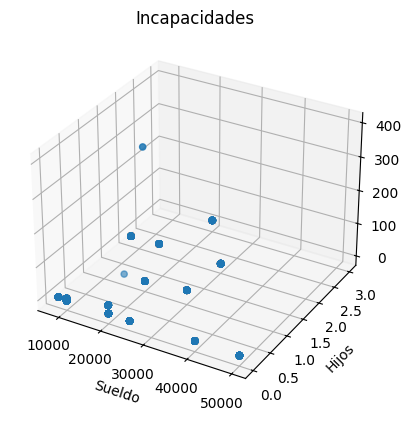

In [82]:
#Gráfica en 3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(data['Sueldo'], data['Hijos'], data['Incapacidades'], marker='o')
plt.xlabel('Sueldo')
plt.ylabel('Hijos')
plt.title('Incapacidades')

**Perfilado de datos**

In [ ]:
#!pip install ydata-profiling

#from ydata_profiling import ProfileReport

#profile_data=ProfileReport(data, minimal=True) # minimal=True
#profile_data



In [ ]:
#Guardamos en html el perfilado de datos
#profile_data.to_file(output_file="output.html")

# 4. Limpieza de datos: atípicos
- Sólo se limpian errores

In [85]:
#Se asigna valor nulo a los atípicos
data.Incapacidades[data["Incapacidades"]>365]=np.nan #Nulo
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Casado         1079 non-null   category
 1   Carro          1078 non-null   category
 2   Hijos          1079 non-null   int64   
 3   Casa           1079 non-null   category
 4   Sexo           1079 non-null   category
 5   Sueldo         1079 non-null   int64   
 6   Incapacidades  1078 non-null   float64 
 7   Antiguedad     1077 non-null   float64 
 8   Fuga           1079 non-null   category
dtypes: category(5), float64(2), int64(2)
memory usage: 39.7 KB


/tmp/ipython-input-435883717.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data.Incapacidades[data["Incapacidades"]>365]=np.nan #Nulo
/tmp/ipython-input-435883717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [86]:
# Incluir todas las reglas de calidad


# **5. Limpieza de datos nulos: Imputación**

Estrategia:
* Eliminar registros con mas de 30% de nulos
* Eliminar columnas con mas de 15%-20% de nulos
* Imputar por media, moda, mediana, vecinos cercanos. No se puede imputar más allá del 15% de los datos.
* Para casos especiales se crea modelo predictivo

In [87]:
#Limpieza de datos nulos: Imputación por la media y moda
from sklearn.impute import SimpleImputer

#Imputacion de variables numéricas: media
var_numericas = ['Incapacidades','Antiguedad']
ImpNumeros = SimpleImputer(missing_values=np.nan, strategy='mean')
data[var_numericas] = ImpNumeros.fit_transform(data[var_numericas])

#Imputacion de variables categóricas: moda
var_categoricas = ['Carro']
ImpCategorias = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data[var_categoricas] = ImpCategorias.fit_transform(data[var_categoricas])

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Casado         1079 non-null   category
 1   Carro          1079 non-null   object  
 2   Hijos          1079 non-null   int64   
 3   Casa           1079 non-null   category
 4   Sexo           1079 non-null   category
 5   Sueldo         1079 non-null   int64   
 6   Incapacidades  1079 non-null   float64 
 7   Antiguedad     1079 non-null   float64 
 8   Fuga           1079 non-null   category
dtypes: category(4), float64(2), int64(2), object(1)
memory usage: 47.0+ KB


In [88]:
#Valores de la imputación
print(ImpNumeros.statistics_)
print(ImpCategorias.statistics_)


[5.25974026 8.18662953]
['Sí']


# 5. Análisis de correlaciones

**Correlaciones para redundacia= mayores |0.8|**

In [90]:
# Todas las variables deben ser numéricas para calcular las correlaciones
# Se crean dummies para las variables categóricas

data_num = pd.get_dummies(data, drop_first=True, dtype=int)
data_num.head()

,Hijos,Sueldo,Incapacidades,Antiguedad,Casado_Sí,Carro_Sí,Casa_Prop,Sexo_M,Fuga_Sí
0,0,10000,7.0,15.0,1,0,0,0,0
1,1,20000,3.0,3.0,0,1,0,1,1
2,2,15000,5.0,10.0,1,1,1,0,1
3,1,30000,15.0,7.0,1,1,0,1,0
4,0,10000,1.0,6.0,1,1,1,0,1


In [91]:
#Correlaciones
correlaciones=data_num.corr()
correlaciones


,Hijos,Sueldo,Incapacidades,Antiguedad,Casado_Sí,Carro_Sí,Casa_Prop,Sexo_M,Fuga_Sí
Hijos,1.000000,-0.088208,-0.009335,-0.043236,0.651359,0.441850,0.626839,-0.326711,-0.286804
Sueldo,-0.088208,1.000000,0.014302,0.524112,-0.275918,-0.262990,-0.266518,0.611942,-0.083314
Incapacidades,-0.009335,0.014302,1.000000,-0.164894,0.039897,-0.330893,-0.249287,0.403594,-0.444169
Antiguedad,-0.043236,0.524112,-0.164894,1.000000,0.166948,-0.207404,-0.034004,-0.003403,-0.033314
Casado_Sí,0.651359,-0.275918,0.039897,0.166948,1.000000,0.259807,0.599620,-0.490593,-0.338676
Carro_Sí,0.441850,-0.262990,-0.330893,-0.207404,0.259807,1.000000,0.490941,-0.124544,0.265097
Casa_Prop,0.626839,-0.266518,-0.249287,-0.034004,0.599620,0.490941,1.000000,-0.388352,0.051885
Sexo_M,-0.326711,0.611942,0.403594,-0.003403,-0.490593,-0.124544,-0.388352,1.000000,0.057676
Fuga_Sí,-0.286804,-0.083314,-0.444169,-0.033314,-0.338676,0.265097,0.051885,0.057676,1.000000


<Axes: >

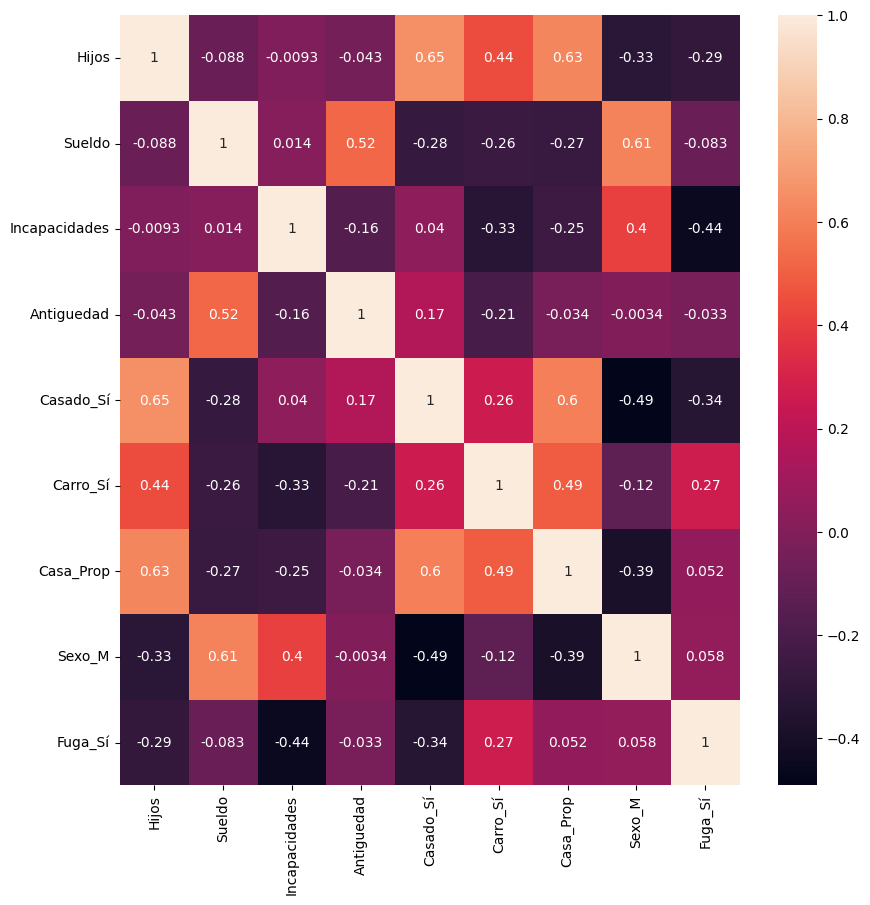

In [92]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data_num.corr(),annot=True)

In [93]:
#Detección de redundantes = se buscan correlaciones peligrosamente altas (0.8-1.0)

#data = data.drop('redundante',axis=1)
#data.head()

**Correlaciones para irrelevancia con la variable objetivo= se buscan correlaciones con la variable objetivo muy bajas (0.0-0.05 ) ->ultima fila**

In [94]:
#Correlaciones con la variable de objetivo
cor_variable_obj=correlaciones.loc['Fuga_Sí']
cor_variable_obj

,Fuga_Sí
Hijos,-0.286804
Sueldo,-0.083314
Incapacidades,-0.444169
Antiguedad,-0.033314
Casado_Sí,-0.338676
Carro_Sí,0.265097
Casa_Prop,0.051885
Sexo_M,0.057676
Fuga_Sí,1.000000


<BarContainer object of 9 artists>

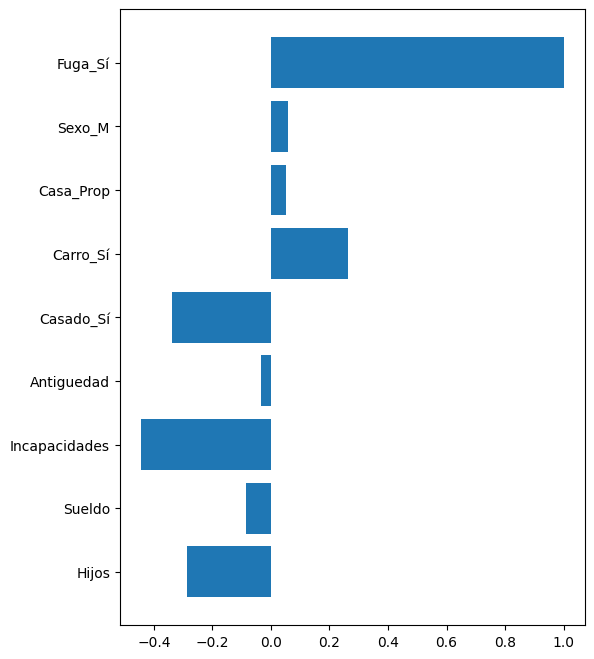

In [95]:
plt.figure(figsize=(6, 8))
plt.barh(y = data_num.columns, width=cor_variable_obj)

In [96]:
#Detección de irrelevantes = se buscan correlaciones con la variable objetivo muy bajas (0.0-0.05 ) ->ultima fila

data = data.drop('Antiguedad',axis=1)
data.head()

,Casado,Carro,Hijos,Casa,Sexo,Sueldo,Incapacidades,Fuga
0,Sí,No,0,Alquiler,H,10000,7.0,No
1,No,Sí,1,Alquiler,M,20000,3.0,Sí
2,Sí,Sí,2,Prop,H,15000,5.0,Sí
3,Sí,Sí,1,Alquiler,M,30000,15.0,No
4,Sí,Sí,0,Prop,H,10000,1.0,Sí


# 6. Balanceo de la variable objetivo (Clasificación)

/tmp/ipython-input-3891706825.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data["Fuga"]).plot(kind="bar")


<Axes: xlabel='Fuga'>

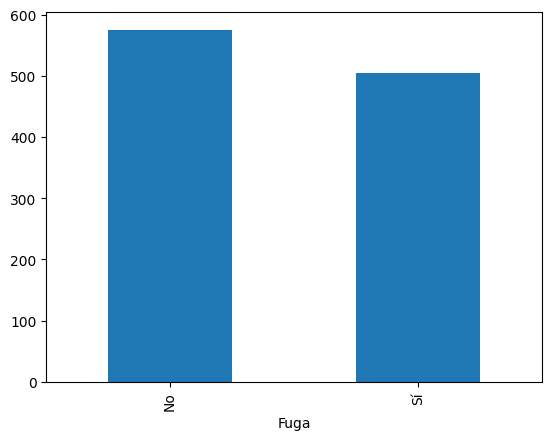

In [97]:
#Variable objetivo
pd.value_counts(data["Fuga"]).plot(kind="bar")

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Casado         1079 non-null   category
 1   Carro          1079 non-null   object  
 2   Hijos          1079 non-null   int64   
 3   Casa           1079 non-null   category
 4   Sexo           1079 non-null   category
 5   Sueldo         1079 non-null   int64   
 6   Incapacidades  1079 non-null   float64 
 7   Fuga           1079 non-null   category
dtypes: category(4), float64(1), int64(2), object(1)
memory usage: 38.5+ KB


In [99]:
from imblearn.over_sampling import SMOTE, SMOTENC

#sm = SMOTE( k_neighbors=2) para variables predictoras numéricas
#sm = SMOTENC(categorical_features=[], k_neighbors=2) para variables predictoras categóricas

sm = SMOTENC(categorical_features=[0,1,3,4], k_neighbors=2) #se indican las variables predictoras categoricas
X= data.drop('Fuga', axis=1) #Predictoras
Y= data['Fuga'] #Objetivo
X_bal, Y_bal = sm.fit_resample(X,Y) #X= variables predictoras Y=variable objetivo


<Axes: xlabel='Fuga'>

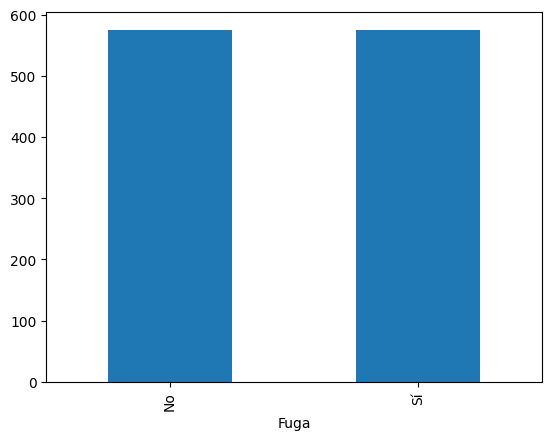

In [100]:
# Creamos un dataframe con los resultados
data  = pd.DataFrame(columns=X.columns.values, data=X_bal)
data['Fuga']=Y_bal
data['Fuga'].value_counts().plot(kind='bar')


# 7. Ingeniería de Características
Creación de nuevas variables

Transformaciones:

- Si el metodo de ML es para variables categóricas (arboles, bayes, apriori)->Discretización
- Si el mertodo de ML es para variables numéricas(RN, regresiones, SVM, Knn, Kmeans)->Normalizar, dummies a las predictoras y labelencoder a la objetivo





**`7.1 Discretización`**: Transformación de número a categoría

<Axes: xlabel='Incapacidades'>

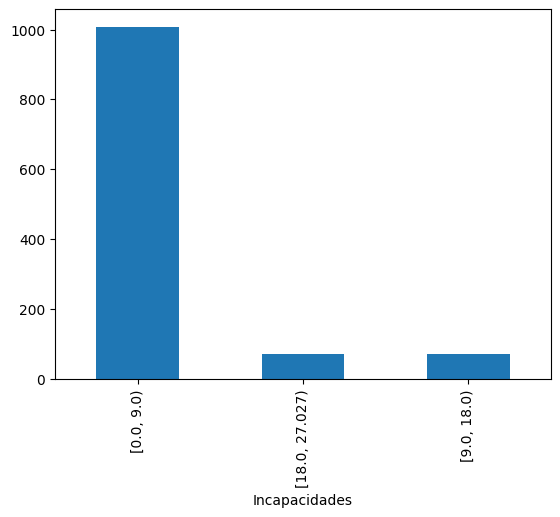

In [101]:
#Cut
data_cat=data.copy()
data_cat['Incapacidades'] = pd.cut(data_cat['Incapacidades'] , bins=3, right = False)
data_cat['Incapacidades'].value_counts().plot(kind='bar')

<Axes: xlabel='Sueldo'>

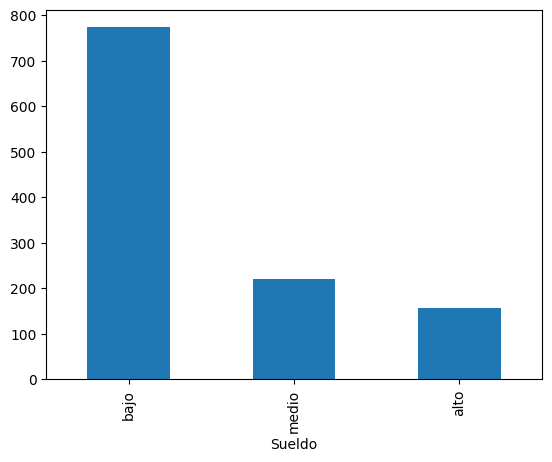

In [102]:
#Discretizar indicando los nombres de las categorías
data_cat['Sueldo'] = pd.cut(data_cat['Sueldo'] , bins=3, labels=['bajo','medio','alto'])
data_cat['Sueldo'].value_counts().plot(kind='bar')

<Axes: xlabel='Hijos'>

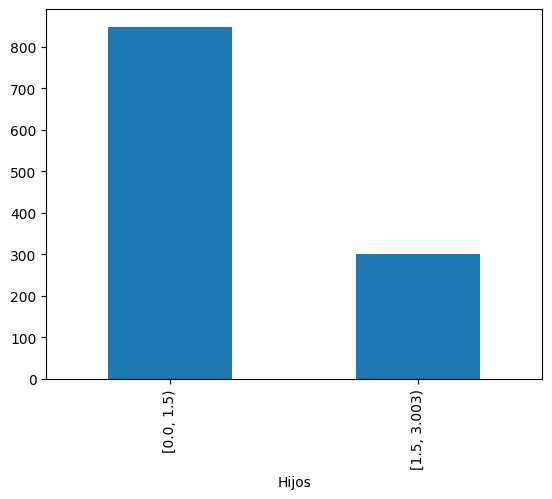

In [103]:
data_cat['Hijos'] = pd.cut(data_cat['Hijos'] , bins=2, right = False)
data_cat['Hijos'].value_counts().plot(kind='bar')


**`7.2 Normalización de variables numéricas`**

In [104]:
#Normalización: Sólo para variables numéricas (no dummies)
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
data[[ 'Hijos', 'Sueldo','Incapacidades']] = min_max_scaler.fit_transform(data[['Hijos', 'Sueldo','Incapacidades']])
data.head()

,Casado,Carro,Hijos,Casa,Sexo,Sueldo,Incapacidades,Fuga
0,Sí,No,0.000000,Alquiler,H,0.047619,0.259259,No
1,No,Sí,0.333333,Alquiler,M,0.285714,0.111111,Sí
2,Sí,Sí,0.666667,Prop,H,0.166667,0.185185,Sí
3,Sí,Sí,0.333333,Alquiler,M,0.523810,0.555556,No
4,Sí,Sí,0.000000,Prop,H,0.047619,0.037037,Sí


In [105]:
data.describe()

,Hijos,Sueldo,Incapacidades
count,1150.000000,1150.000000,1150.000000
mean,0.237971,0.309358,0.187867
std,0.329816,0.280966,0.248250
min,0.000000,0.000000,0.000000
25%,0.000000,0.047619,0.037037
50%,0.000000,0.285714,0.111111
75%,0.666667,0.523810,0.192400
max,1.000000,1.000000,1.000000


**`7.3 Dummies:`** Transformación de categorías a números

In [106]:
#Variables categóricas con 2 categorías -> Borramos una dummy
data = pd.get_dummies(data, columns=['Casado','Carro','Casa','Sexo'], drop_first=True)

#Variables categóricas con más de 2 categorías -> No borramos
#data = pd.get_dummies(data, columns=['Cat'], drop_first=False)
data.head()

,Hijos,Sueldo,Incapacidades,Fuga,Casado_Sí,Carro_Sí,Casa_Prop,Sexo_M
0,0.000000,0.047619,0.259259,No,True,False,False,False
1,0.333333,0.285714,0.111111,Sí,False,True,False,True
2,0.666667,0.166667,0.185185,Sí,True,True,True,False
3,0.333333,0.523810,0.555556,No,True,True,False,True
4,0.000000,0.047619,0.037037,Sí,True,True,True,False


**`7.4 Label Encoder:`** sólo para la variable objetivo

In [107]:
# Encoder: Transformación de categorías a números (sólo para la variable objetivo)
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
data["Fuga"] = labelencoder.fit_transform(data["Fuga"])
data.head()

,Hijos,Sueldo,Incapacidades,Fuga,Casado_Sí,Carro_Sí,Casa_Prop,Sexo_M
0,0.000000,0.047619,0.259259,0,True,False,False,False
1,0.333333,0.285714,0.111111,1,False,True,False,True
2,0.666667,0.166667,0.185185,1,True,True,True,False
3,0.333333,0.523810,0.555556,0,True,True,False,True
4,0.000000,0.047619,0.037037,1,True,True,True,False


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Hijos          1150 non-null   float64
 1   Sueldo         1150 non-null   float64
 2   Incapacidades  1150 non-null   float64
 3   Fuga           1150 non-null   int64  
 4   Casado_Sí      1150 non-null   bool   
 5   Carro_Sí       1150 non-null   bool   
 6   Casa_Prop      1150 non-null   bool   
 7   Sexo_M         1150 non-null   bool   
dtypes: bool(4), float64(3), int64(1)
memory usage: 40.6 KB


# 8. Guardar los datos preparados

In [109]:
data_cat.to_excel("./datos_categoricos.xlsx")

In [110]:
data.to_excel('./datos_numericos.xlsx')